In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001168455"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001168455
SIC,6153
Description,SHORT-TERM BUSINESS CREDIT INSTITUTIONS
Name,PLUMAS BANCORP
Ticker,PLBC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,31.0,7.437419e+00,1.280737e+00,5.51,6.67,7.33,7.83,10.26
interest income,28.0,6.260071e+06,8.582054e+05,5165000.00,5584250.00,5985000.00,6808500.00,7767000.00
net income,28.0,7.503929e+05,1.263463e+06,-3231000.00,529500.00,1195000.00,1365250.00,2107000.00
net interest income,28.0,4.396464e+06,1.657967e+06,-852000.00,4185500.00,4965000.00,5338750.00,6307000.00
provision for loan losses,28.0,8.889286e+05,1.343153e+06,100000.00,200000.00,300000.00,750000.00,5850000.00


# Plots

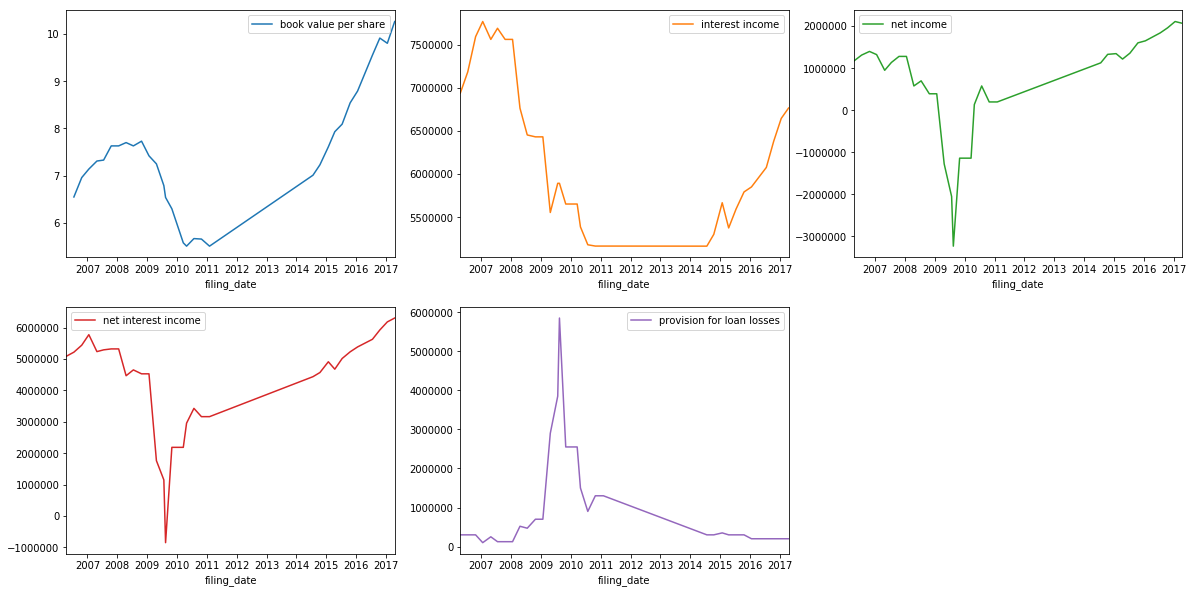

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001168455 book value per share                             2006Q1    missing   
           book value per share       2011Q1 to 2014Q1: 13 periods    missing   
           book value per share                             2016Q1    missing   
           interest income                                  2007Q4    missing   
           interest income                                  2008Q4    missing   
           interest income                                  2009Q4    missing   
           interest income            2010Q4 to 2014Q1: 14 periods    missing   
           interest income                                  2016Q1    missing   
           net income                                       2007Q4    missing   
           net income                                       2008Q4    missing   
           net income                                       2009Q2  duplicate   
           net income                                       2009Q4    missing   
           net income                 2010Q4 to 2014Q1: 14 periods    missing   
           net income                                       2016Q1    missing   
           net interest income                              2007Q4    missing   
           net interest income                              2008Q4    missing   
           net interest income                              2009Q2  duplicate   
           net interest income                              2009Q4    missing   
           net interest income        2010Q4 to 2014Q1: 14 periods    missing   
           net interest income                              2016Q1    missing   
           provision for loan losses                        2007Q4    missing   
           provision for loan losses                        2008Q4    missing   
           provision for loan losses                        2009Q2  duplicate   
           provision for loan losses                        2009Q4    missing   
           provision for loan losses  2010Q4 to 2014Q1: 14 periods    missing   
           provision for loan losses                        2016Q1    missing   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0001168455 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income          Duplicate period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses    Duplicate period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()